In [1]:
from upsetplot import *
from matplotlib import pyplot
import pandas as pd
import os

In [2]:
path= r"C:\Users\Axel\Documents\Présentations\FragBank\Publication\DATAs\CLEAN"

concatenated_df = pd.DataFrame()

for files in os.listdir(path):
    if files.endswith(".csv") and files != "concats.csv":
        df = pd.read_csv(os.path.join(path,files), sep=";", encoding="UTF-8")

        concatenated_df = pd.concat([concatenated_df, df], axis=0)

concatenated_df = concatenated_df[['FILENAME', 'INCHIKEY']]

# print(concatenated_df)

# Utilisez la méthode rename() avec des expressions régulières
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*MSMS_.*', 'MSMS_Public', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*MoNA.*', 'MoNA', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*XML_.*', 'HMDB', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*MassBank.*', 'MassBank', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*ALL_GNPS.*', 'GNPS', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*HMDB.*', 'HMDB', regex=True)

# Créez une nouvelle colonne d'index
nouvel_index = range(1, len(concatenated_df) + 1)

# Ajoutez cette colonne d'index au DataFrame pivot_df
concatenated_df['Index'] = nouvel_index

# Réorganisez les colonnes pour mettre la nouvelle colonne d'index en première position
df = concatenated_df[['Index'] + [col for col in concatenated_df.columns if col != 'Index']]

# Utilisez la fonction pivot pour réorganiser les données
pivot_df = df.pivot(index='Index', columns='FILENAME', values='INCHIKEY')

print(pivot_df)

# Remplacez les valeurs non définies par une chaîne vide
pivot_df = pivot_df.fillna('')

C:\Users\Axel\AppData\Local\Temp\ipykernel_31904\215753587.py:7: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,files), sep=";", encoding="UTF-8")
C:\Users\Axel\AppData\Local\Temp\ipykernel_31904\215753587.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,files), sep=";", encoding="UTF-8")


FILENAME                         GNPS                         HMDB   
Index                                                                
1                                 NaN                          NaN  \
2                                 NaN                          NaN   
3         IPJCJXBAPHPSRU-UHFFFAOYNA-N                          NaN   
4         NRTMSHOVWJHXSI-UHFFFAOYNA-N                          NaN   
5         GANCTHYOYGVYND-UHFFFAOYNA-N                          NaN   
...                               ...                          ...   
912622    XPPKVPWEQAFLFU-UHFFFAOYSA-J                          NaN   
912623                            NaN  XPRXJFAFJFZWTC-UHFFFAOYSA-N   
912624                            NaN  PFIOVWFQJFGYGV-UHFFFAOYSA-N   
912625                            NaN  PFIOVWFQJFGYGV-UHFFFAOYSA-N   
912626                            NaN  PFIOVWFQJFGYGV-UHFFFAOYSA-N   

FILENAME MSMS_Public MassBank                         MoNA  
Index                       

In [3]:
pivot_df.to_csv(r'C:\Users\Axel\Documents\Présentations\FragBank\Publication\DATAs\CLEAN\concats.csv',sep=";",encoding="UTF-8", index=False)

In [4]:
print(pivot_df)

FILENAME                         GNPS                         HMDB   
Index                                                                
1                                                                   \
2                                                                    
3         IPJCJXBAPHPSRU-UHFFFAOYNA-N                                
4         NRTMSHOVWJHXSI-UHFFFAOYNA-N                                
5         GANCTHYOYGVYND-UHFFFAOYNA-N                                
...                               ...                          ...   
912622    XPPKVPWEQAFLFU-UHFFFAOYSA-J                                
912623                                 XPRXJFAFJFZWTC-UHFFFAOYSA-N   
912624                                 PFIOVWFQJFGYGV-UHFFFAOYSA-N   
912625                                 PFIOVWFQJFGYGV-UHFFFAOYSA-N   
912626                                 PFIOVWFQJFGYGV-UHFFFAOYSA-N   

FILENAME MSMS_Public MassBank                         MoNA  
Index                       

In [5]:
pivot_df = pivot_df.to_dict('list')

In [6]:
for key,val in pivot_df.items():
    print(key)
    pivot_df[key] = list(set(val))

GNPS
HMDB
MSMS_Public
MassBank
MoNA


In [7]:
print(pivot_df)

{'GNPS': ['', 'SMEROWZSTRWXGI-JKTPOEMPSA-N', 'LULOMARGYGRZLR-HYOGKJQXSA-N', 'CFTZBGSPPBNRNF-GXFVINSESA-N', 'LFTYTUAZOPRMMI-FTFHWYEPSA-N', 'MZBFYGYTZIZFQC-UHFFFAOYSA-N', 'MLMDACHSXKCQIF-UHFFFAOYSA-N', 'DRGBJEBIIJHOSV-UHFFFAOYSA-N', 'JANCGRAYPVHLAB-UHFFFAOYSA-N', 'MYWZGSROPRXVPM-AUMMCNCRSA-N', 'VZHYCZQYZCBGSS-UHFFFAOYSA-N', 'FPHAZHKZJQOPBU-LGFBOSHVSA-N', 'WLXGFAVTAAQOFH-UHFFFAOYSA-N', 'SKUGZRGAYUSNFO-MXVIHJGJSA-N', 'KQXDHUJYNAXLNZ-XQSDOZFQSA-N', 'QHMTXANCGGJZRX-WUXMJOGZSA-N', 'BLRFSIIHFKZEDN-PCHRQBGLSA-N', 'RVCRIPILOFSMFG-ASSOPURVSA-N', 'ZSWFGLVDMKTZIO-NTEUORMPSA-N', 'OJISWUQNQQWEND-FCVLBCLDSA-N', 'IKSYBPLYPLDCSW-FOEIDLOLSA-N', 'WFSYATBEJTUDQA-QCGXMQLOSA-N', 'CLHYKPBCCXMSGW-UHFFFAOYSA-N', 'RKWZHADQZUUWHF-INIZCTEOSA-N', 'ZPNHGSNYBLXGOL-UHFFFAOYSA-N', 'VMTHPSSNJFUGBF-CMDGGOBGSA-N', 'GEZBXBRXWZJSAV-UHFFFAOYSA-N', 'LCEURBZEQJZUPV-UHFFFAOYSA-N', 'JHAYEQICABJSTP-UHFFFAOYSA-N', 'GVQOVMKBYJKZSY-UHFFFAOYSA-N', 'GCXJISBMJWCIPK-HDEDRUJMSA-N', 'YPRNBZFQTBKRDW-UHFFFAOYSA-N', 'KYIPVUWVVGXMKA-CRDZCYSOS

In [8]:
upset_data = from_contents(pivot_df)

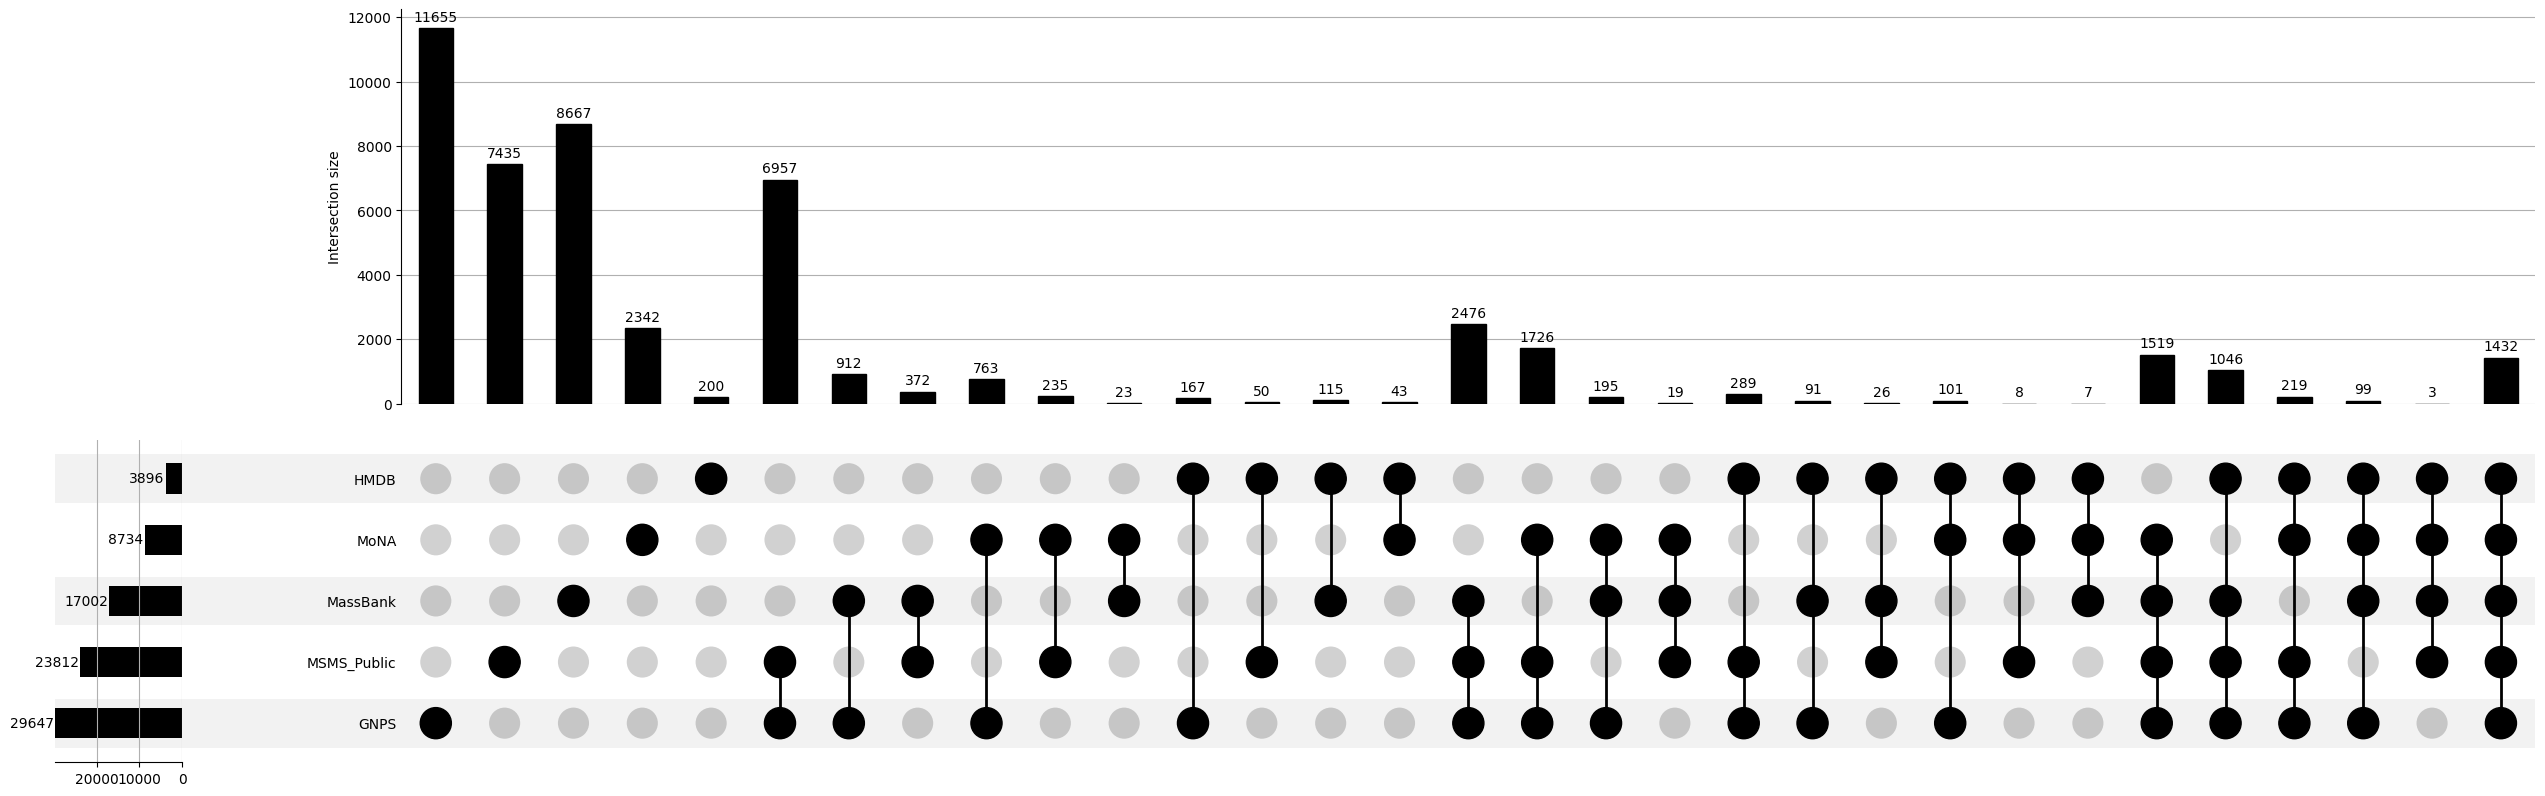

In [9]:
ax_dict = UpSet(upset_data, subset_size='count', show_counts=True, element_size=64).plot()